# TME 2-4  : Séléction de publicité

## Parsage des données

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as disp
%matplotlib inline

filepath = "CTR.txt"
with open(filepath, 'r') as f:
    data = f.read()
    
article_ids = []
contexts = []
probas = []

for line in data.split('\n'):
    if ':' in line:
        [art_id, ctx, proba] = line.split(':')
        article_ids.append(int(art_id))
        contexts.append([float(s) for s in ctx.split(';')])
        probas.append([float(s) for s in proba.split(';')])

contexts = np.array(contexts)
probas   = np.array(probas)

n_articles = len(article_ids)
n_advertisers = probas.shape[1]

np.set_printoptions(precision=3)
print("Contexts:")
print(contexts[:5])

print("Probas:")
print(probas[:5])

Contexts:
[[ 0.748  0.835  0.077  0.172  0.143]
 [ 0.168  0.134  0.435  0.996  0.049]
 [ 0.485  0.567  0.042  0.963  0.185]
 [ 0.622  0.196  0.131  0.44   0.299]
 [ 0.332  0.086  0.023  0.926  0.334]]
Probas:
[[ 0.103  0.191  0.     0.102  0.036  0.075  0.235  0.     0.     0.079]
 [ 0.     0.     0.     0.021  0.     0.     0.023  0.     0.147  0.325]
 [ 0.11   0.137  0.     0.098  0.075  0.     0.     0.     0.015  0.194]
 [ 0.     0.151  0.     0.127  0.112  0.     0.012  0.034  0.     0.086]
 [ 0.     0.109  0.     0.152  0.05   0.     0.     0.037  0.119  0.217]]


## Baseline : Random

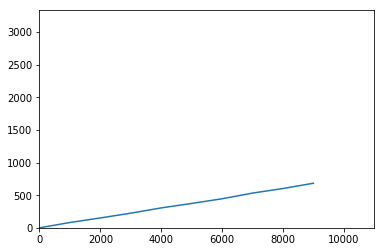

767 clicks.


In [73]:
do_plot = True
def plot_clicks(n_visits, x_values, y_values):
    disp.clear_output(wait=True)
    plt.plot(x_values, y_values)
    plt.xlim(0, n_visits*1.1)
    plt.ylim(0, n_visits/3)
    plt.show()


n_visits = int(1e4)
n_clicks = 0
x_values = []
y_values = []
for it in range(n_visits):
    article = np.random.choice(article_ids)
    advertiser = np.random.choice(probas[article])
    if np.random.rand() < advertiser:
        n_clicks += 1
    if it%1000 == 0:
        x_values.append(it)
        y_values.append(n_clicks)
        plot_clicks(n_visits, x_values, y_values)
print("%d clicks." % n_clicks)

## Baseline : Static best

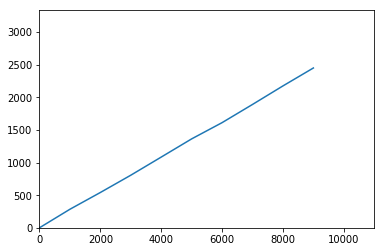

2727 clicks.


In [75]:
n_visits = int(1e4)

agg_clickrate = np.mean(probas, axis=0)
best_rate = max(agg_clickrate)

n_clicks = 0
x_values = []
y_values = []

for it in range(n_visits):
    article = np.random.choice(article_ids)
    if np.random.rand() < best_rate:
        n_clicks += 1
    if it%1000 == 0:
        x_values.append(it)
        y_values.append(n_clicks)
        plot_clicks(n_visits, x_values, y_values)

print("%d clicks." % n_clicks)

## Baseline : Optimal

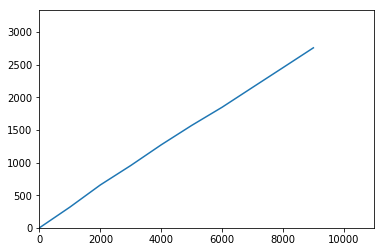

3096 clicks.


In [77]:
n_visits = int(1e4)

n_clicks = 0
x_values = []
y_values = []

for it in range(n_visits):
    article = np.random.choice(article_ids)
    if np.random.rand() < max(probas[article]):
        n_clicks += 1
    if it%1000 == 0:
        x_values.append(it)
        y_values.append(n_clicks)
        plot_clicks(n_visits, x_values, y_values)

print("%d clicks." % n_clicks)

## UCB

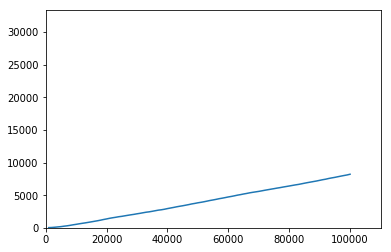

8211 clicks.


In [82]:
trials    = np.zeros_like(probas)
successes = np.zeros_like(probas)

unknown_proba = 0.5

n_visits = int(1e5)
n_clicks = 0
x_values = []
y_values = []

for it in range(1, n_visits+1):
    article = np.random.choice(article_ids)
    probas_estim = successes/trials
    probas_estim[np.isinf(probas_estim)] = unknown_proba
    chosen_ad = np.argmax(probas_estim[article] \
                          + np.sqrt(2*np.log(i)/trials[article]))
    trials[article, chosen_ad] += 1
    if np.random.rand() < probas[article, chosen_ad]:
        n_clicks += 1
        successes[article, chosen_ad] +=1
    if it % 1000 == 0:
        x_values.append(it)
        y_values.append(n_clicks)
        plot_clicks(n_visits, x_values, y_values)

print("%d clicks." % n_clicks)